# AIR QUALITY PREDICTION USING LINEAR REGRESSION

- https://en.tutiempo.net/climate  Using this website builded the Webscrapping with the library of beautyfulsoup


In this Project Scrapping the data from the website and after taken data we calcluated the daily hours Air Qulaity data into daily average data of 2013 to 2017  for target value of PM2.5 after we Predicting the Air Quality using Linear Regression  

Columns
- T	Average annual temperature
- TM	Annual average maximum temperature
- Tm	Average annual minimum temperature
- PP	Rain or snow precipitation total annual
- V	Annual average wind speed
- RA	Number of days with rain
- SN	Number of days with snow
- TS	Number of days with storm
- FG	Number of foggy days
- TN	Number of days with tornado
- GR	Number of days with hail

Lets import required libraries to the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets extract the data from the file

In [4]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


Lets Check the dataset have null values or not uisng heatmap

<AxesSubplot:>

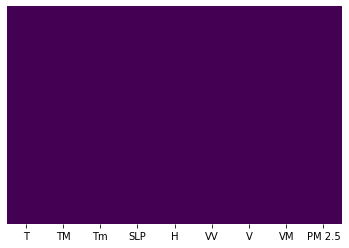

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

As we seen here PM 2.5 has one null values lets drop the one column beacause one values of drop will not effect to the model...

In [16]:
df = df.dropna()

Lets split the dataset into independent and dependent features

In [17]:
X = df.iloc[:,:-1]  ##Independent Features, 
#In this we just drop the last feature and consider reamaining features as 
#independent features

Y = df.iloc[:,-1] ##Dependent Features,
##In this we just drop all the feature instaead last features
#for dependent features

Lets check the correlation of all features with Multivariant 

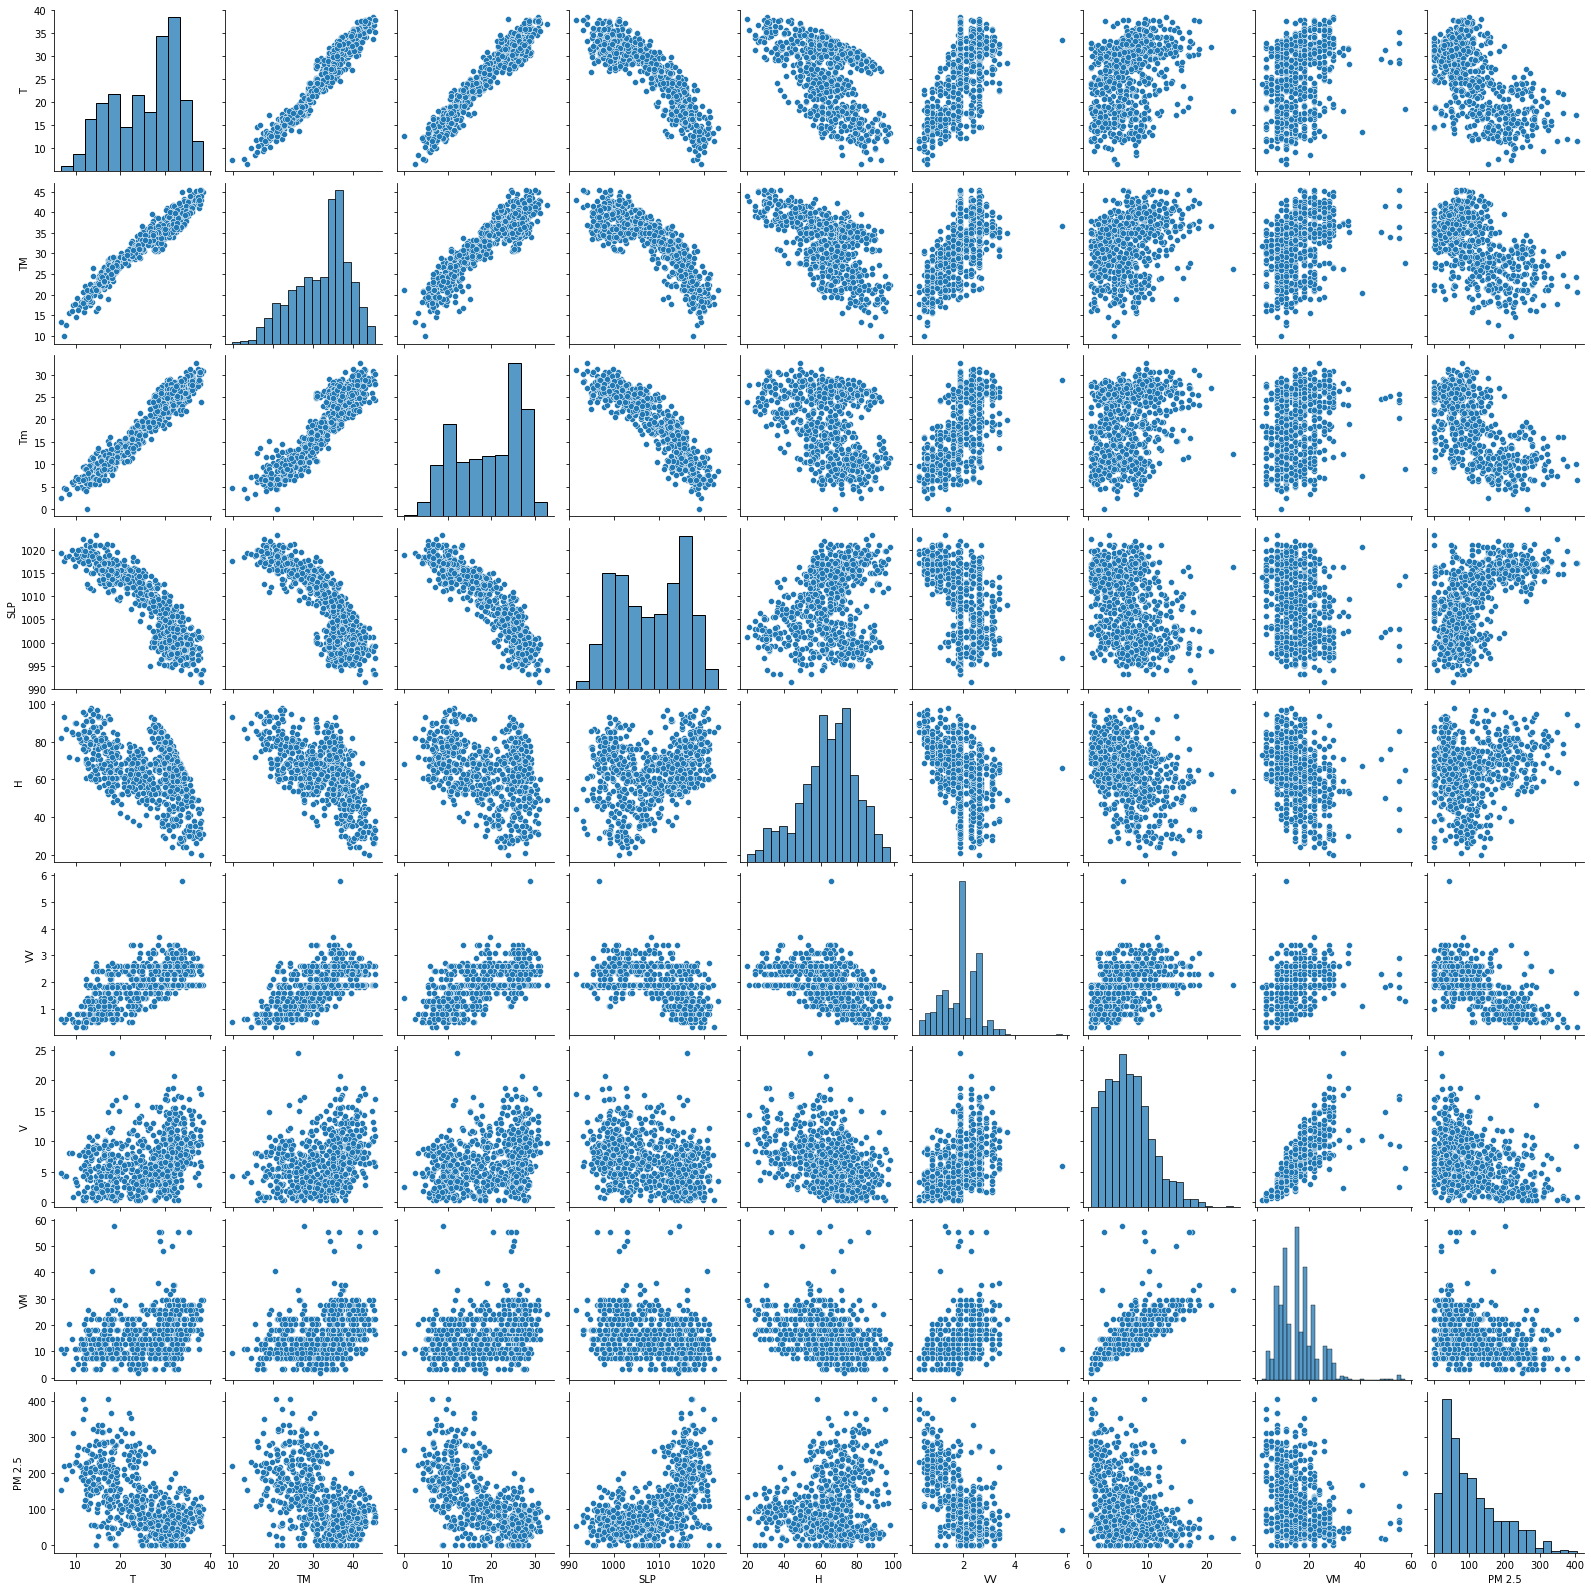

In [18]:
sns.pairplot(df)

Check the all Features Correlations

In [19]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [25]:
#Lets get Correlations of each features in dataset
corrmat = df.corr()

In [26]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

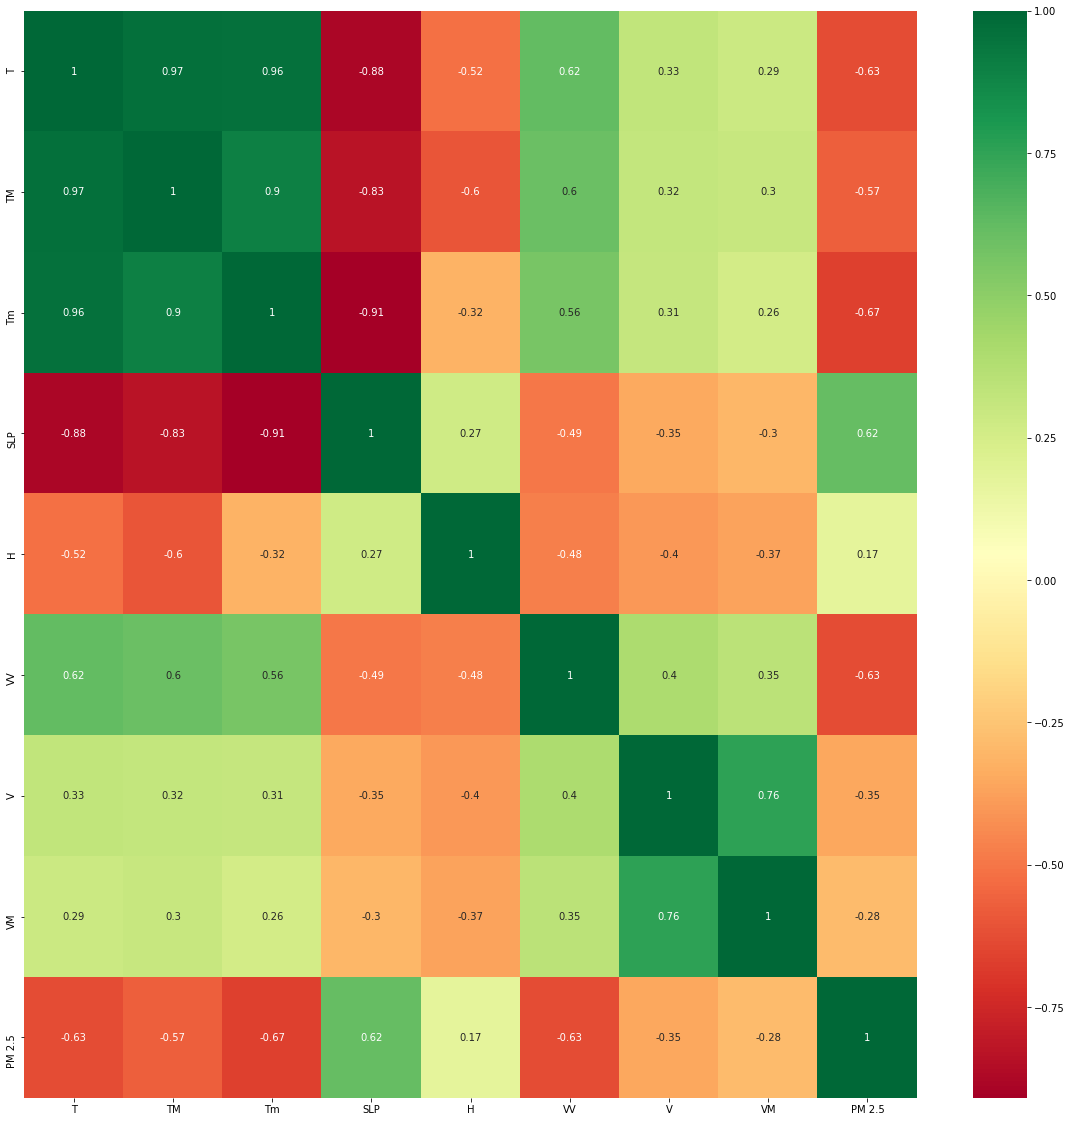

In [23]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)


ExtraTreesRegressor()

In [33]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


Lets Check the which features have more values using ensemble techniques of Feature selection

In [36]:
print(model.feature_importances_)

[0.165886   0.09391187 0.17356502 0.1292003  0.08139158 0.25912898
 0.05701879 0.03989745]


Lets visualize the data with top 5 features and top 5 features will aply to the model

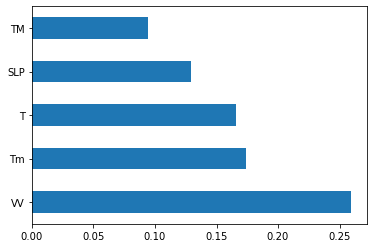

In [43]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Applying  Linear Regression Model

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

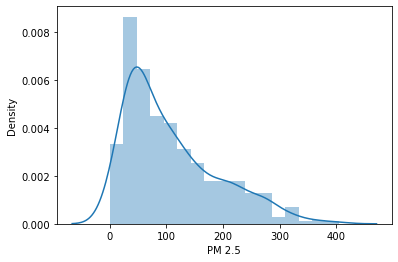

In [45]:
sns.distplot(Y)

It looks like Right Skwed Distribution 

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
Regressor = LinearRegression()

In [54]:
Regressor.fit(X_train,Y_train)

LinearRegression()

In [55]:
Regressor.coef_

array([ 2.63949039e+00,  5.19978529e-01, -7.59811846e+00,  4.93219944e-01,
       -8.37064222e-01, -5.04301355e+01, -2.75417778e+00, -3.92662839e-02])

In [56]:
Regressor.intercept_

-157.37425475061315

Lets find the R Squared value for train data

In [92]:
print("Coefficient of determination R^2 <-- on train set: {}".format(Regressor.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.6007706404750855


R square Value of train data is near to 1 so its prety much good

Lets find the R Squared Value for Test Data

In [61]:
print("Coefficient of determination R^2 <-- on train set: {}".format(Regressor.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on train set: 0.5316188612878152


R square Value of test data is also near to 1 so its prety much good

Lets check cross validation score

In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Regressor,X,Y,cv=5)

In [68]:
score.mean()

0.46724362258523333

## Model Evalaution

In [74]:
coeff_df = pd.DataFrame(Regressor.coef_,X.columns,columns=['Coefficient'])

In [75]:
coeff_df

,Coefficient
T,2.639490
TM,0.519979
Tm,-7.598118
SLP,0.493220
H,-0.837064
VV,-50.430135
V,-2.754178
VM,-0.039266


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *increase of 2.639490 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.519979 in AQI PM 2.5 *.
- Holding all other features fixed, a 1 unit increase in Tm is associated with an *decrease of -7.598118 in AQI PM 2.5 *.
- Holding all other features fixed, a 1 unit increase in SLP is associated with an *increase of 0.493220 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in H is associated with an *increase of -0.837064 in AQI PM 2.5 *.
- Holding all other features fixed, a 1 unit increase in VV is associated with an *decrease of -50.430135 in AQI PM 2.5 *.
- Holding all other features fixed, a 1 unit increase in V is associated with an *decrease of -2.754178 in AQI PM 2.5 *.
- Holding all other features fixed, a 1 unit increase in VM is associated with an *decrease of -0.039266 in AQI PM 2.5 *.






Lets predict the test data

In [76]:
prediction = Regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

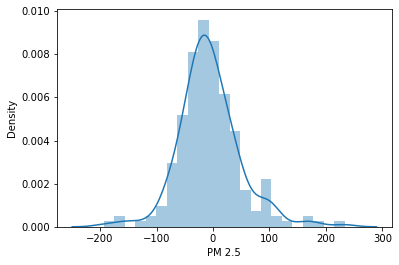

In [77]:
sns.distplot(Y_test - prediction)

The test data has Gaussian Distributiion it so good to help to predict the data

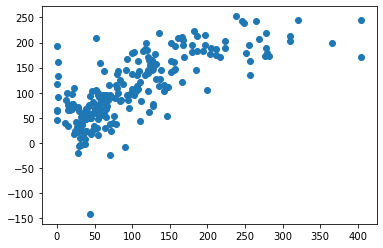

In [79]:
plt.scatter(Y_test,prediction)

Scatter visualization also shows the its good for test data 

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [86]:
from sklearn import metrics

In [88]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 40.28335537132943
MSE: 3057.6641286741387
RMSE: 55.296149311449696


For the deploymenent process save the file using pickle package

In [90]:
import pickle 
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(Regressor, file)